In [1]:
import torch
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Subset


from transformer_batch_corrections import Correction_data, make_resampled_dataset
from asses_batch_effect import batchless_entropy_estimate, abs_effect_estimate, fisher_kldiv, compute_F_stat

In [2]:
# CrossTab_name = 'synth_batch_0.8_bio_0.3'
CrossTab_name = 'synth_batch_0.4_bio_0.7'
# CrossTab_name = 'synth_batch_0.4_bio_0.2'
# CrossTab_name = 'peptide_crosstab_1'
PATH_TO_DATA   = 'data/' + CrossTab_name + '.txt'
CrossTab = pd.read_csv(PATH_TO_DATA,   delimiter = '\t')
minibatch_size = 60
megabatch_size = 50
batch_size = 20
n_batches = 6
correction_reg = 0.3
batch_reg = 2
depth = 1
n_divisions = 2
n_overlap = 2
run_name = CrossTab_name + "_metric_{0}_dep_{1}_reg_{2}_mb_{3}_rs_{4}".format([n_divisions, n_overlap], depth, [correction_reg, batch_reg], minibatch_size, megabatch_size)
PATH_TO_CORRECTED_DATA = 'data/corrected_data/' + run_name + '_corrected.txt'

In [ ]:
crosstab = torch.tensor(CrossTab.values)
xx = torch.mean(torch.mean(crosstab.view(len(CrossTab), 6, 20), 2), 0)
xx = torch.stack([xx] * len(CrossTab), dim = 0).repeat_interleave(20, 1)
xx = pd.DataFrame(crosstab - xx)
new_CrossTab = xx
new_CrossTab.index = CrossTab.index
torch.mean(torch.mean(torch.tensor(new_CrossTab.values).view(len(new_CrossTab), 6, 20), 2), 0)

In [3]:
test = Correction_data(CrossTab = CrossTab, depth = depth, batch_reg = batch_reg, correction_reg = correction_reg,
                       n_batches = n_batches, batch_size = batch_size, test_size = 3000, 
                       minibatch_size = minibatch_size, random_state = 69, 
                       n_divisions = n_divisions, n_overlap = n_overlap)

In [4]:
test.train_model(epochs = 21, report_frequency = 20, abs_effect_cutoff = 0, resample_training = megabatch_size, run_name = run_name, finetune_training = False)

Epoch 0 report : testing loss is 0.0 while train loss is 12215.03774752167 and absolute effect in testing data is 9.33315145074476

Training loss is 216.76564935767647
Training loss is 201.32883259860853
Training loss is 180.60945911622676
Training loss is 154.84630442924103
Training loss is 125.38642805355738
Training loss is 94.784241504682
Training loss is 66.55011384895151
Training loss is 43.22476015022978
Training loss is 26.196385959328076
Training loss is 15.12053088025051
Training loss is 8.563551510582775
Training loss is 4.85075764282795
Training loss is 2.838196406459642
Training loss is 1.7091600940968619
Training loss is 1.0334841361983729
Training loss is 0.6431756210199835
Training loss is 0.40061129835801923
Training loss is 0.2526455026714917
Training loss is 0.1661540960074564
Training loss is 0.1017552369781547
Epoch 20 report : testing loss is 0.23638646344686626 while train loss is 0.1017552369781547 and absolute effect in testing data is 0.5833457721383224

Train

<Figure size 640x480 with 0 Axes>

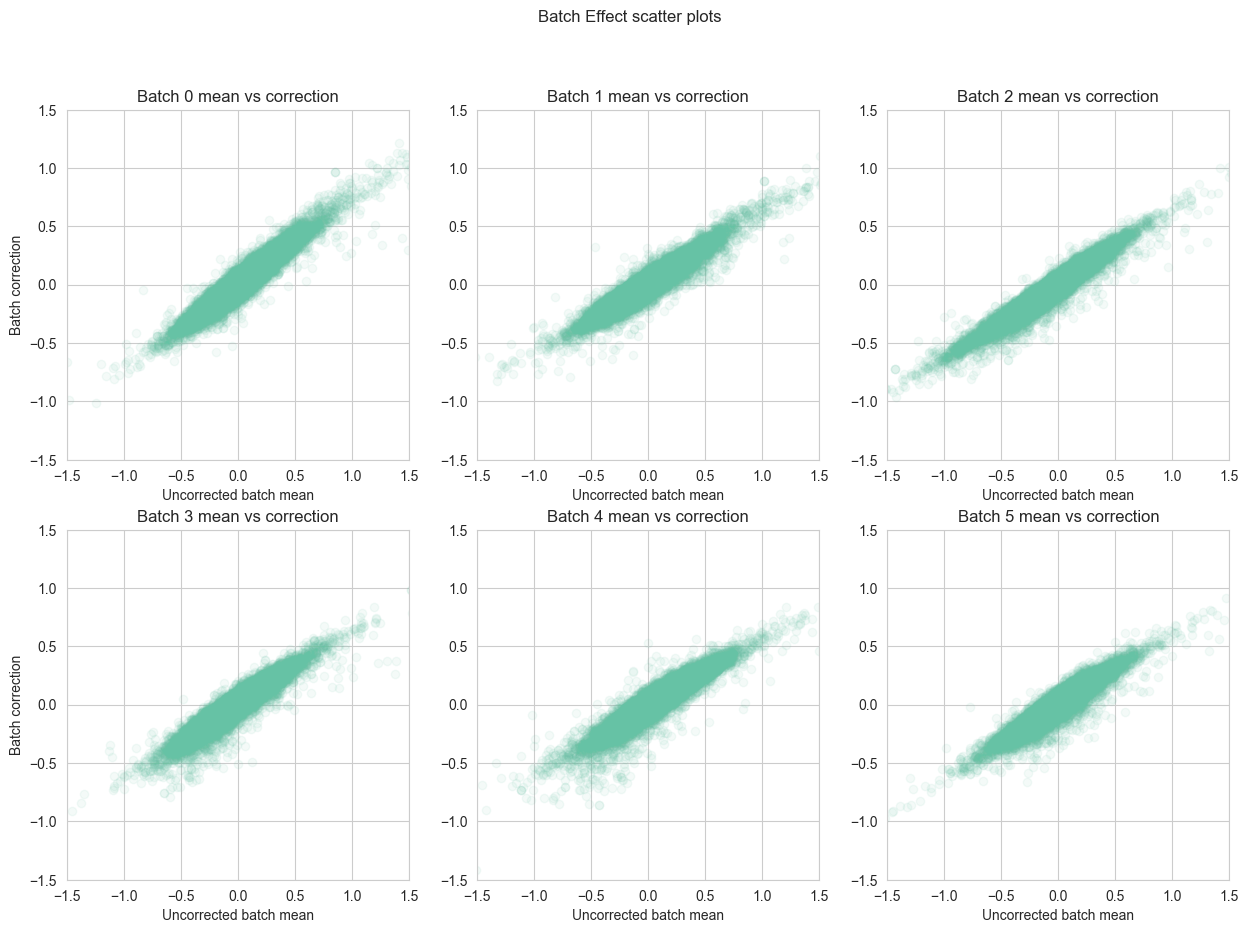

In [34]:
test.scatter_comparison()

In [5]:
torch.mean(torch.mean(torch.tensor(test.corrected_data.values).view(len(test.corrected_data), 6, 20), 2), 0)

tensor([-0.0596, -0.0978, -0.1812, -0.1134, -0.0446,  0.0417],
       dtype=torch.float64)

In [8]:
test.train_model(epochs = 301, report_frequency = 20, abs_effect_cutoff = 0, resample_training = megabatch_size, run_name = run_name, finetune_training = True)

Epoch 0 report : testing loss is 0.054205564600521006 while train loss is 0 and absolute effect in testing data is 0.5386258561679519

Training loss is 0.0446662731760093
Training loss is 0.0421426197432681
Training loss is 0.042543889387434634
Training loss is 0.03822649483786681
Training loss is 0.04169865936262209
Training loss is 0.03854087540114972
Training loss is 0.04014459660557033
Training loss is 0.037225981359822954
Training loss is 0.04023921906320873
Training loss is 0.040292091773951516
Training loss is 0.033571497217508496
Training loss is 0.035964395802265035
Training loss is 0.03661008892977562
Training loss is 0.037508759699991276
Training loss is 0.03478408202473027
Training loss is 0.031124751908608146
Training loss is 0.038412370510680034
Training loss is 0.03561312595577013
Training loss is 0.034367693586026926
Training loss is 0.036826284987712
Epoch 20 report : testing loss is 0.044411781942803125 while train loss is 0.036826284987712 and absolute effect in test

<Figure size 640x480 with 0 Axes>

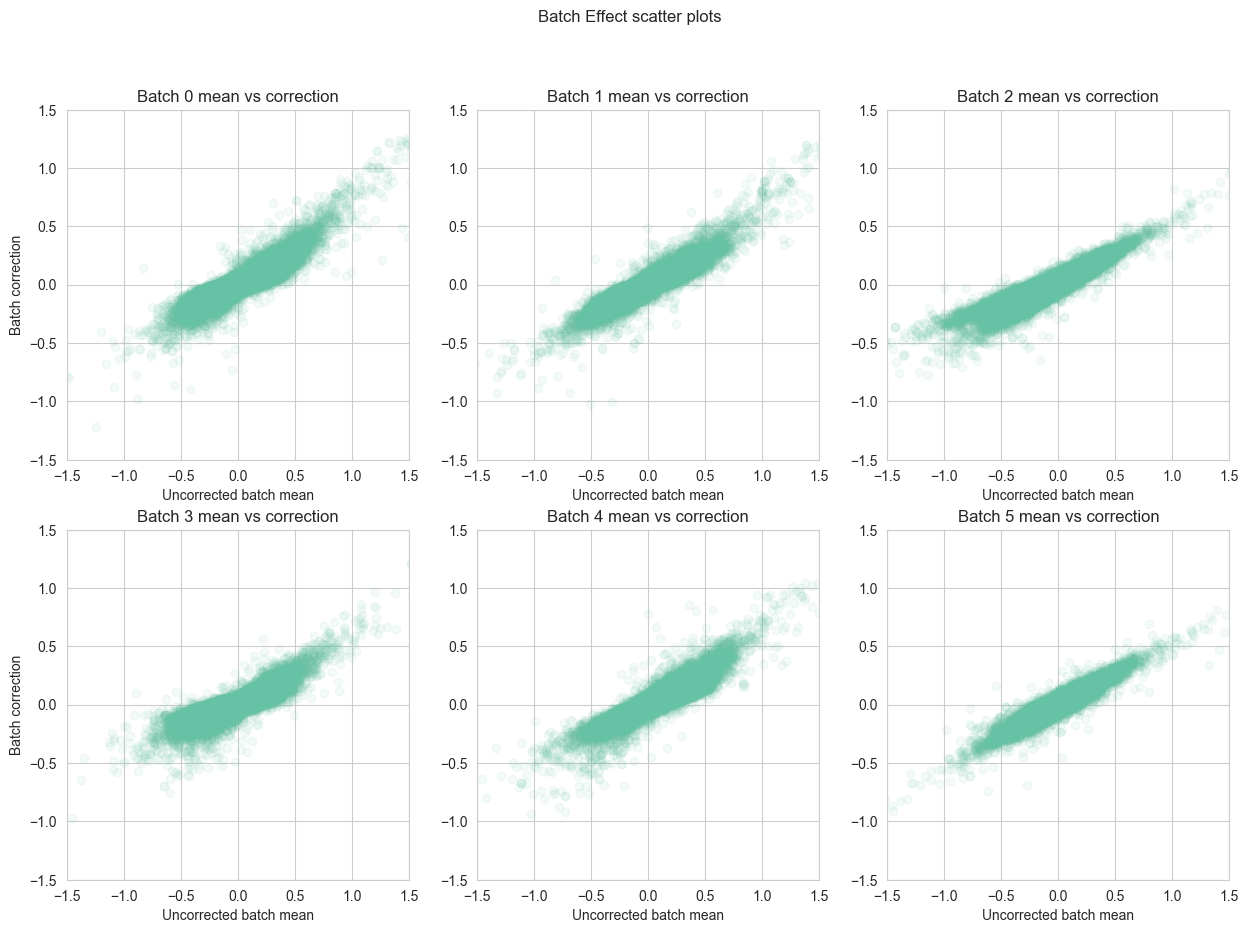

In [36]:
test.scatter_comparison()

In [37]:
test.corrected_data.to_csv(PATH_TO_CORRECTED_DATA, sep = "\t")

In [8]:
CrossTab_name = 'synthetic_data_batchPercent_60_groupPercent_10'
# CrossTab_name = 'peptide_crosstab_1'
PATH_TO_DATA   = 'data/' + CrossTab_name + '.txt'
CrossTab = pd.read_csv(PATH_TO_DATA,   delimiter = '\t')
minibatch_size = 60
megabatch_size = 50
batch_size = 20
n_batches = 6
reg_factor = 0.5
depth = 2
n_divisions = 2
n_overlap = 2
run_name = CrossTab_name + "_ndivs_{0}_dep_{1}_reg_{2}_mb_{3}_rs_{4}".format([n_divisions, n_overlap], depth, reg_factor, minibatch_size, megabatch_size)

In [9]:
test = Correction_data(CrossTab = CrossTab, depth = depth, reg_factor = reg_factor, 
                       n_batches = n_batches, batch_size = batch_size, test_size = 3000, 
                       minibatch_size = minibatch_size, random_state = 69, 
                       n_divisions = n_divisions, n_overlap = n_overlap)


In [10]:
test.train_model(epochs = 21, report_frequency = 10, abs_effect_cutoff = 0, resample_training = megabatch_size, run_name = run_name, finetune_training = False)

Epoch 0 report : testing loss is 0.0 while train loss is 20252.405375178427 and absolute effect in testing data is 15.041683232209824

Training loss is 384.9986064144287
Training loss is 357.7443981596761
Training loss is 320.3814906742274
Training loss is 272.52015488217836
Training loss is 216.55226527818698
Training loss is 157.62085751460563
Training loss is 102.87428658666637
Training loss is 58.61649443209957
Training loss is 29.383571239047917
Training loss is 13.38251534072521
Epoch 10 report : testing loss is 8.383579974070905 while train loss is 13.38251534072521 and absolute effect in testing data is 1.7189052920742713

Training loss is 6.088909363907989
Training loss is 2.937627117140924
Training loss is 1.529093616811471
Training loss is 0.8562641311735659
Training loss is 0.505712978569554
Training loss is 0.3033607196353813
Training loss is 0.1853285620418109
Training loss is 0.1263235745521028
Training loss is 0.07322184060617974
Training loss is 0.05879041517130886
Epo

In [ ]:
test.scatter_comparison()

In [ ]:
test.train_model(epochs = 21, report_frequency = 10, abs_effect_cutoff = 0, resample_training = megabatch_size, run_name = run_name, finetune_training = True)

Epoch 0 report : testing loss is 0.0 while train loss is 20252.405375178427 and absolute effect in testing data is 15.041683232209824

Training loss is 384.9986064144287
Training loss is 357.7443981596761
Training loss is 320.3814906742274
Training loss is 272.52015488217836
Training loss is 216.55226527818698
Training loss is 157.62085751460563
Training loss is 102.87428658666637
Training loss is 58.61649443209957
Training loss is 29.383571239047917
Training loss is 13.38251534072521
Epoch 10 report : testing loss is 8.383579974070905 while train loss is 13.38251534072521 and absolute effect in testing data is 1.7189052920742713

Training loss is 6.088909363907989
Training loss is 2.937627117140924
Training loss is 1.529093616811471
Training loss is 0.8562641311735659
Training loss is 0.505712978569554
Training loss is 0.3033607196353813
Training loss is 0.1853285620418109
Training loss is 0.1263235745521028
Training loss is 0.07322184060617974
Training loss is 0.05879041517130886
Epo

<Figure size 640x480 with 0 Axes>

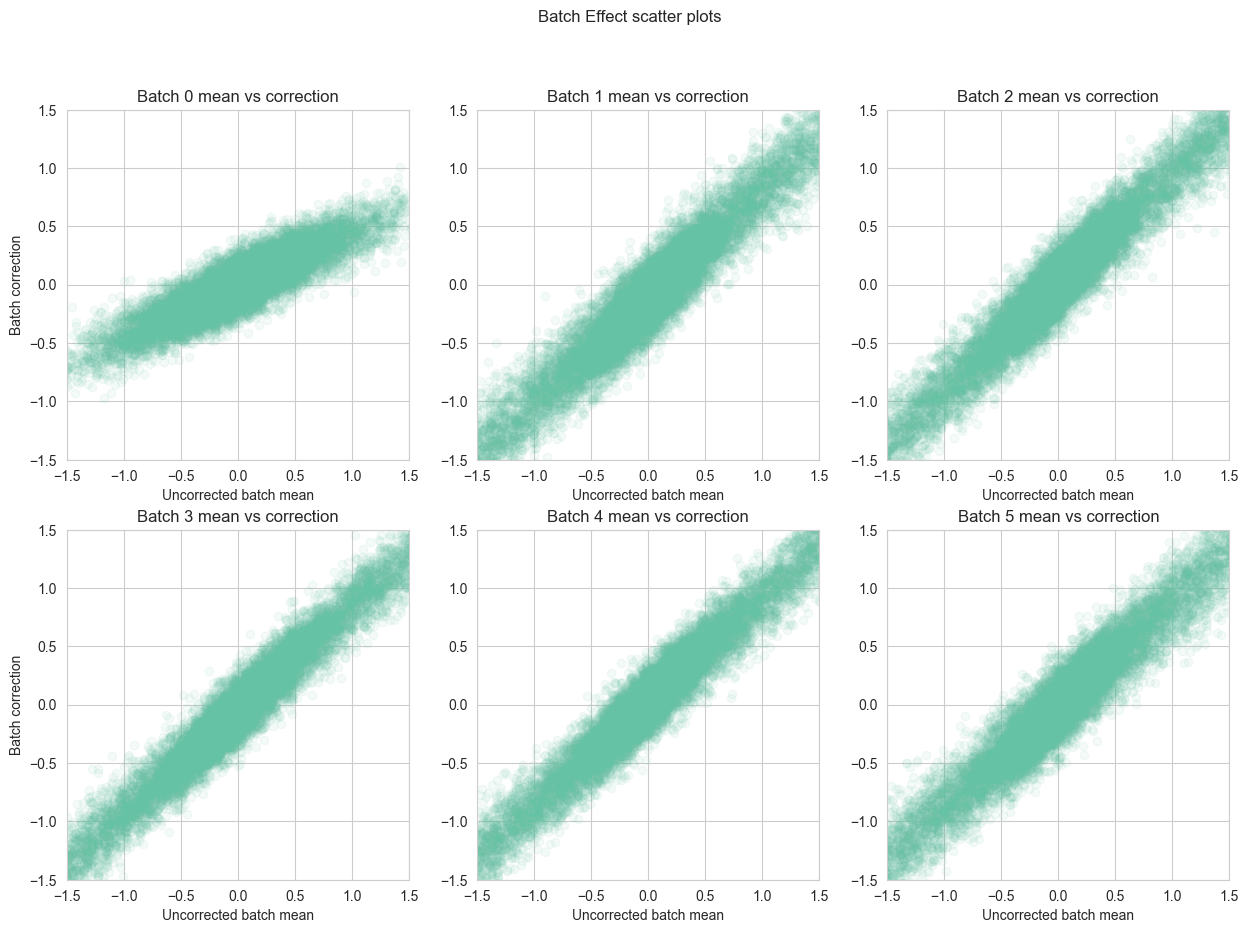

In [11]:
test.scatter_comparison()

In [ ]:
test.train_model(epochs = 101, report_frequency = 10, abs_effect_cutoff = 0, resample_training = megabatch_size, run_name = run_name, finetune_training = True)

In [ ]:
test.scatter_comparison()

In [ ]:
window = 2/3
n_overlap = 3
loader = torch.utils.data.DataLoader(test.TRAIN_DATA, shuffle = False, batch_size = megabatch_size)
step = len(test.TRAIN_DATA)*window//n_overlap
window_N = step*n_overlap
N = (len(test.TRAIN_DATA)//step)*step

tensor_crosstab = []
for _, _, y, mask in loader:
    y, z = test.compute_correction(y, mask)
    tensor_crosstab.append(y-z)

tensor_crosstab = torch.cat(tensor_crosstab)
F_stat = compute_F_stat(tensor_crosstab, test.n_batches, test.batch_size)
F_df = pd.DataFrame({'index' : range(0, len(F_stat)), 'F_stat' : F_stat.cpu().detach().numpy()})

A = F_df.sort_values(by = 'F_stat', ascending = False)
B = pd.concat([A,A])


In [ ]:
[B['index'].to_list()[i*step:(n_overlap + i)*step] for i in range(0, n_div)]

In [ ]:
B.iloc[70446]

In [ ]:
window = 2/3
n_overlap = 3
loader = torch.utils.data.DataLoader(test.TRAIN_DATA, shuffle = False, batch_size = megabatch_size)
step = len(test.TRAIN_DATA)*window//n_overlap
tensor_crosstab = []
for _, _, y, mask in loader:
    y, z = test.compute_correction(y, mask)
    tensor_crosstab.append(y-z)

tensor_crosstab = torch.cat(tensor_crosstab)
F_stat = compute_F_stat(tensor_crosstab, test.n_batches, test.batch_size)
F_df = pd.DataFrame({'index' : range(0, len(F_stat)), 'F_stat' : F_stat.cpu().detach().numpy()})

C = F_df.sort_values(by = 'F_stat', ascending = False)

section_loaders = [C['index'].to_list()[i*div_size:(1+i)*div_size] for i in range(0, n_div)]
for index, section in enumerate(section_loaders):
    section = self.CrossTab.iloc[section]
    resampled_data = make_resampled_dataset(CrossTab = section, n_batches = self.n_batches, 
                                            minibatch_size = self.minibatch_size)
    resampled_loader = torch.utils.data.DataLoader(resampled_data, shuffle = True, batch_size = megabatch_size)
    section_loaders[index] = resampled_loader
self.finetune_loaders = self.finetune_loaders + section_loaders
self.batchless_entropy_distributions = self.batchless_entropy_distributions + batchless_entropy_distribuions(self.n_batches, self.batch_size, n_div)


In [ ]:
C[0:2000000]

In [ ]:
natural_distributions[4]

In [ ]:
n_div = 5
div_size = len(test.loader.dataset)//n_div
tensor_crosstab = []
for _, _, y, mask in test.loader:
    y, z = test.compute_correction(y, mask)
    tensor_crosstab.append(y-z)

tensor_crosstab = torch.cat(tensor_crosstab)
individual_distance = fisher_kldiv(tensor_crosstab, test.n_batches, test.batch_size, 0)
individual_distance = pd.DataFrame({'index' : range(0, len(individual_distance)),
                                    'distance' : individual_distance.cpu().detach().numpy()})

C = individual_distance.sort_values(by = 'distance', ascending = False)

section_loaders = [C['index'].to_list()[i*div_size:(1+i)*div_size] for i in range(0, n_div)]
for index, section in enumerate(section_loaders):
    section = test.CrossTab.iloc[section]
    resampled_data = make_resampled_dataset(CrossTab = section, n_batches = test.n_batches, 
                                            minibatch_size = test.minibatch_size, n_stack = 10, 
                                            test_size = 0, random_state = test.random_state)
    resampled_loader = torch.utils.data.DataLoader(resampled_data, shuffle = True, batch_size = megabatch_size)
    section_loaders[index] = resampled_loader


In [ ]:
C

In [ ]:
fisher_kldiv(next(iter(section_loaders[4]))[0], test.n_batches, test.batch_size, 0)

In [ ]:
fisher_kldiv(sections[4][2515][2], test.n_batches, test.batch_size, test.batchless_entropy)

In [ ]:
sections[0]

In [ ]:
divisions = 5
crosstab = []
for _, _, y, mask in test.loader:
    y, z = test.compute_correction(y, mask)
    crosstab.append(y-z)

crosstab = torch.cat(crosstab)
individual_distance = fisher_kldiv(crosstab, test.n_batches, test.batch_size, test.batchless_entropy)
individual_distance = pd.DataFrame({'index' : range(0, len(individual_distance)),
                                    'distance' : individual_distance.cpu().detach().numpy()})

C = individual_distance.sort_values(by = 'distance', ascending = True)

A = C['index'].to_list()[:len(C)//2]
B = C['index'].to_list()[len(C)//2:]

A = random.sample(A, k = len(A)) 
B = random.sample(B, k = len(A))
n_minibatch = len(loader)
A_last = 0
B_last = 0

new_order = []
for minibatch_i in range(0, n_minibatch):
    if (minibatch_i % 2 == 0):
        new_minibatch = A[A_last:A_last + math.floor(A_prop * self.minibatch_size)] + B[B_last:B_last + math.ceil(B_prop * self.minibatch_size)]
        A_last += math.floor(A_prop * self.minibatch_size)
        B_last += math.ceil(B_prop * self.minibatch_size)
        new_order += new_minibatch
    else:
        new_minibatch = A[A_last:A_last + math.ceil((1 - A_prop) * self.minibatch_size)] + B[B_last:B_last + math.floor((1 - B_prop) * self.minibatch_size)]
        A_last += math.ceil(B_prop * self.minibatch_size)
        B_last += math.floor(A_prop * self.minibatch_size)
        new_order += new_minibatch

# print(new_order[0:10])
dataset_shuffled = Subset(loader.dataset, indices = new_order)
new_loader = torch.utils.data.DataLoader(dataset_shuffled, shuffle = True, batch_size = self.minibatch_size)
return(new_loader)